In [ ]:
%reload_ext nb_black


In [33]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from {}".format(postgres_db), con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [4]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
score_cols = ['math score', 'reading score', 'writing score']
cat_cols = ['gender', 'race/ethnicity', 'parental level of education']

In [22]:
df[cat_cols[-1]].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

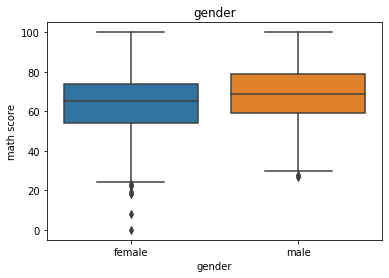

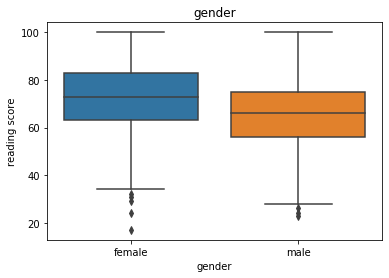

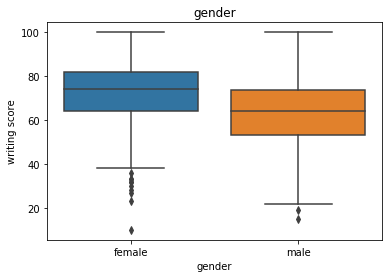

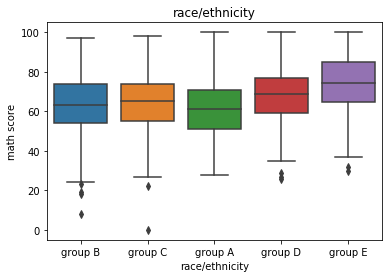

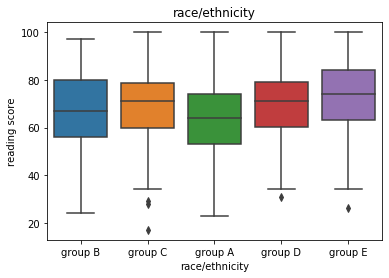

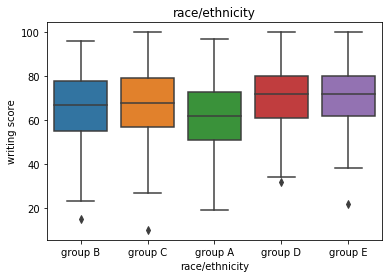

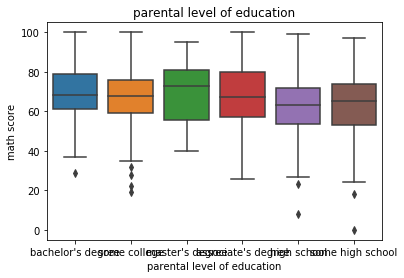

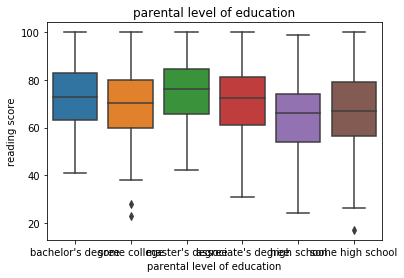

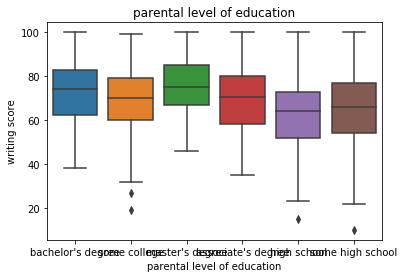

In [21]:
for cat in cat_cols:
    for score in score_cols:
        sns.boxplot(cat, score, data = df)
        plt.title(cat)
        plt.show()

In [ ]:
for cat in cat_cols:
    for score in score_cols:
        sns.boxplot(cat, score, data = df)
        plt.title(cat)
        plt.show()

In [54]:
for cat in cat_cols:
    print(cat)
    print('-----')
    if df[cat].nunique()==2:
        for score in score_cols:
            print(score)
            _, p = stats.ttest_ind(df[df[cat]==df[cat].unique()[0]][score], df[df[cat]==df[cat].unique()[1]][score])
            print(p)
    else:
        for score in score_cols:
            print(score)
            for i in range(df[cat].nunique()-1):
                print(df[cat].unique()[i] + ' & ' + df[cat].unique()[i+1])
                _, p = stats.ttest_ind(df[df[cat]==df[cat].unique()[i]][score], df[df[cat]==df[cat].unique()[i+1]][score])
                print(p)
        

gender
-----
math score
9.120185549328822e-08
reading score
4.680538743933289e-15
writing score
2.019877706867934e-22
race/ethnicity
-----
math score
group B & group C
0.4647708939167453
group C & group A
0.11043810745588042
group A & group D
0.0009068636053543751
group D & group E
2.3187640326715042e-05
reading score
group B & group C
0.1866592809035069
group C & group A
0.010364398025471079
group A & group D
0.002488654464332207
group D & group E
0.045033306431345586
writing score
group B & group C
0.1110010959814519
group C & group A
0.004610690740740428
group A & group D
4.084805733969806e-05
group D & group E
0.4104455517392258
parental level of education
-----
math score
bachelor's degree & some college
0.17151224218471559
some college & master's degree
0.21761956810347416
master's degree & associate's degree
0.4009993636124658
associate's degree & high school
9.247314274963044e-05
high school & some high school
0.388108610360687
reading score
bachelor's degree & some college
0.0

In [49]:
test_array = [df[df[cat]==df[cat].unique()[0]][score], df[df[cat]==df[cat].unique()[1]][score]]
stats.f_oneway(df[df[cat]==df[cat].unique()[0]][score], df[df[cat]==df[cat].unique()[1]][score])

F_onewayResult(statistic=0.5351902599116437, pvalue=0.46477089391675075)

In [31]:
df[df[cat]==df[cat].unique()[0]][score]

0       74
24      80
27      75
60      72
77      81
      ... 
916    100
933     74
969     80
970    100
993     74
Name: writing score, Length: 118, dtype: int64

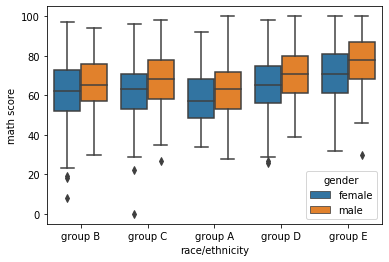

In [13]:
sns.boxplot( 'race/ethnicity','math score', hue = 'gender', data=df)

In [55]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [59]:
lunch = df.groupby(by = 'lunch').mean()
lunch.head()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [ ]:
#significant difference in means. Easier to think on a full stomach I suppose.

In [60]:
df.groupby('test preparation course').mean()
#significantly higher

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [61]:
df[score_cols].corr()
#reading and writing

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [63]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203
